In [2]:
import pandas as pd
import sys
import numpy

sys.path.append('../')
from utils import clustering_utils, dataframe_utils

In [3]:
# MIN-MAX
microarray = pd.read_csv('../TGNE/embedding/test_nn3_leiden_label_df_round_1.csv')
rna_seq = pd.read_csv('../TGNE/embedding/rna_seq_label_df_round_1.csv')

# Z-SCORE
# microarray = pd.read_csv('../TGNE/embedding/testz_nn3_leiden_label_df_round_1.csv')
# rna_seq = pd.read_csv('../TGNE/embedding/rnaz_seq_label_df_round_1.csv')

In [4]:
ttherm_df = pd.read_csv('./tt.csv')

ttherm_df

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue
0,TTHERM_01127520,6.662691,7.776168,27.401980,1.338125e-11,1.011772e-07,18.024832,6.994917
1,TTHERM_00056190,5.202193,6.263239,26.798823,1.710010e-11,1.011772e-07,17.901069,6.994917
2,TTHERM_00155590,-7.775511,7.559874,-25.317986,3.196561e-11,1.011772e-07,17.572169,6.994917
3,TTHERM_00261850,5.436875,9.935126,25.284801,3.242994e-11,1.011772e-07,17.564364,6.994917
4,TTHERM_00558440,5.832609,6.506094,25.275719,3.255830e-11,1.011772e-07,17.562224,6.994917
...,...,...,...,...,...,...,...,...
18805,TTHERM_00118750,-0.000507,9.107810,-0.000889,9.993062e-01,9.995187e-01,-3.030899,0.000209
18806,TTHERM_00691925,0.000396,6.037489,0.000775,9.993955e-01,9.995549e-01,-3.030900,0.000193
18807,TTHERM_01141638,0.000390,5.035715,0.000550,9.995712e-01,9.996580e-01,-3.030900,0.000149
18808,TTHERM_00317120,-0.000110,8.166408,-0.000506,9.996048e-01,9.996580e-01,-3.030900,0.000149


In [5]:
import numpy as np

def probability_from_bstat(b_stat):
    odds = np.exp(b_stat)
    
    probability = odds / (1 + odds)
    
    return probability

In [6]:
probability_from_bstat(1)

0.7310585786300049

In [7]:
probability_from_bstat(1.6)

0.8320183851339245

In [8]:
ttherm_df['diff_exp_prob'] = ttherm_df['B'].apply(probability_from_bstat)

In [9]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',]))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
4281,TTHERM_01018540,1.326388,15.056447,5.247592,0.000260,0.001142,4.281836,2.942501,0.986371
6355,TTHERM_00473020,0.933493,15.122860,3.947521,0.002216,0.006557,2.141232,2.183282,0.894847
8024,TTHERM_00321730,0.926411,6.007156,3.161546,0.008892,0.020840,0.766356,1.681112,0.682732
12802,TTHERM_00527180,0.259223,15.769035,1.509230,0.158989,0.233584,-1.922730,0.631556,0.127557
15033,TTHERM_00624720,0.147792,15.825690,0.888567,0.392964,0.491663,-2.622630,0.308333,0.067696
15075,TTHERM_00624730,0.150811,15.838373,0.877985,0.398439,0.497124,-2.631975,0.303535,0.067109
15997,TTHERM_00522600,0.115472,15.778603,0.643030,0.533180,0.626894,-2.813555,0.202806,0.056596
17632,TTHERM_01055600,0.044023,15.939062,0.263930,0.796639,0.849814,-2.993717,0.070676,0.047711
18045,TTHERM_00378890,-0.028959,15.910998,-0.173828,0.865111,0.901714,-3.014742,0.044931,0.046764


In [10]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',]))
].to_csv('~/grls.csv')

In [11]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
[
'TTHERM_00378890',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00624720',
'TTHERM_00537380',
'TTHERM_01055600',
'TTHERM_00221120',
'TTHERM_00471040',
'TTHERM_00624730',
'TTHERM_01002870',
'TTHERM_00473020',
'TTHERM_01002860',
]
    ))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
6355,TTHERM_00473020,0.933493,15.122860,3.947521,0.002216,0.006557,2.141232,2.183282,0.894847
6524,TTHERM_00471040,0.755107,15.359091,3.868636,0.002541,0.007325,2.004923,2.135209,0.881313
7149,TTHERM_00537380,0.861843,14.998235,3.553705,0.004417,0.011620,1.455992,1.934780,0.810919
7928,TTHERM_01002870,0.597344,15.620469,3.202836,0.008257,0.019588,0.839047,1.708001,0.698264
12400,TTHERM_00221120,0.316737,15.680445,1.622608,0.132528,0.201020,-1.767423,0.696761,0.145863
12802,TTHERM_00527180,0.259223,15.769035,1.509230,0.158989,0.233584,-1.922730,0.631556,0.127557
15033,TTHERM_00624720,0.147792,15.825690,0.888567,0.392964,0.491663,-2.622630,0.308333,0.067696
15075,TTHERM_00624730,0.150811,15.838373,0.877985,0.398439,0.497124,-2.631975,0.303535,0.067109
15997,TTHERM_00522600,0.115472,15.778603,0.643030,0.533180,0.626894,-2.813555,0.202806,0.056596
17209,TTHERM_01002860,0.062736,15.854399,0.363720,0.722856,0.790058,-2.960484,0.102341,0.049243


In [12]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
['TTHERM_00046372', 'TTHERM_00537380', 'TTHERM_00473020', 'TTHERM_00038880', 'TTHERM_00527180', 'TTHERM_01002860', 'TTHERM_01055600', 'TTHERM_00378890', 'TTHERM_00624730', 'TTHERM_00624720', 'TTHERM_01002870', 'TTHERM_00471040', 'TTHERM_00522600', 'TTHERM_00221120']
    ))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
346,TTHERM_00046372,4.276693,8.729740,13.089574,4.006646e-08,0.000002,12.557788,5.663903,0.999996
4504,TTHERM_00038880,1.176623,15.284626,5.084140,3.359370e-04,0.001403,4.025408,2.853048,0.982457
6355,TTHERM_00473020,0.933493,15.122860,3.947521,2.215710e-03,0.006557,2.141232,2.183282,0.894847
6524,TTHERM_00471040,0.755107,15.359091,3.868636,2.540873e-03,0.007325,2.004923,2.135209,0.881313
7149,TTHERM_00537380,0.861843,14.998235,3.553705,4.417096e-03,0.011620,1.455992,1.934780,0.810919
7928,TTHERM_01002870,0.597344,15.620469,3.202836,8.257125e-03,0.019588,0.839047,1.708001,0.698264
12400,TTHERM_00221120,0.316737,15.680445,1.622608,1.325277e-01,0.201020,-1.767423,0.696761,0.145863
12802,TTHERM_00527180,0.259223,15.769035,1.509230,1.589890e-01,0.233584,-1.922730,0.631556,0.127557
15033,TTHERM_00624720,0.147792,15.825690,0.888567,3.929643e-01,0.491663,-2.622630,0.308333,0.067696
15075,TTHERM_00624730,0.150811,15.838373,0.877985,3.984391e-01,0.497124,-2.631975,0.303535,0.067109


In [13]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
['TTHERM_00046372', 'TTHERM_00537380', 'TTHERM_00473020', 'TTHERM_00038880', 'TTHERM_00527180', 'TTHERM_01002860', 'TTHERM_01055600', 'TTHERM_00378890', 'TTHERM_00624730', 'TTHERM_00624720', 'TTHERM_01002870', 'TTHERM_00471040', 'TTHERM_00522600', 'TTHERM_00221120'
]
    ))
].shape

(14, 9)

In [14]:
FC = 1.5
logFC = numpy.log2(FC)
q_value = 0.01
B = 1

ttherm_df_filtered = ttherm_df.loc[
    (ttherm_df['logFC'] > logFC)
    &
    (ttherm_df['adj.P.Val'] < q_value)
    &
    (ttherm_df['B'] > B)
].sort_values(by=('B'), ascending=False)

ttherm_df_filtered

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
0,TTHERM_01127520,6.662691,7.776168,27.401980,1.338125e-11,1.011772e-07,18.024832,6.994917,1.000000
1,TTHERM_00056190,5.202193,6.263239,26.798823,1.710010e-11,1.011772e-07,17.901069,6.994917,1.000000
3,TTHERM_00261850,5.436875,9.935126,25.284801,3.242994e-11,1.011772e-07,17.564364,6.994917,1.000000
4,TTHERM_00558440,5.832609,6.506094,25.275719,3.255830e-11,1.011772e-07,17.562224,6.994917,1.000000
5,TTHERM_00196410,5.824968,7.576139,25.020117,3.640732e-11,1.011772e-07,17.501381,6.994917,1.000000
...,...,...,...,...,...,...,...,...,...
6932,TTHERM_00137730,0.830940,9.148884,3.661396,3.652221e-03,9.908882e-03,1.644437,2.003975,0.838138
6934,TTHERM_00735370,0.902300,10.088468,3.660032,3.661000e-03,9.929836e-03,1.642055,2.003058,0.837814
6936,TTHERM_00437590,0.933353,10.129624,3.658763,3.669193e-03,9.949188e-03,1.639838,2.002212,0.837513
6937,TTHERM_01055460,0.845773,7.040025,3.658476,3.671048e-03,9.952782e-03,1.639336,2.002055,0.837445


In [15]:
np.min(ttherm_df_filtered['B'])

1.63655776230789

In [16]:
np.min(ttherm_df['B'])

-3.03089983352944

In [17]:
np.max(ttherm_df['B'])

18.0248324152868

In [91]:
import matplotlib.pyplot as plt

import bokeh
import bokeh.plotting
from bokeh.models import Range1d
from bokeh.transform import linear_cmap

# Define thresholds
fold_change_threshold = logFC  # Threshold for log2 fold change
pvalue_threshold = -np.log10(q_value)  # Threshold for p-value
b_value_threshold = B

cmap = linear_cmap("P", palette='Iridescent20', low=0, high=1)

# colors = np.where(
#     (ttherm_df['logFC'] > fold_change_threshold)
#     & 
#     (ttherm_df['negLogPValue'] > pvalue_threshold)
#     &
#     (ttherm_df['B'] > b_value_threshold), 
#     'red', 
#     'black'
# )
x = ttherm_df['logFC'].values
y = ttherm_df['negLogPValue'].values
B = ttherm_df['B'].values
P = ttherm_df['diff_exp_prob'].values
source = bokeh.models.ColumnDataSource(dict(x=x, y=y, P=P))

fig = bokeh.plotting.figure(width=600, 
                            height=400, 
                            title='Differential upregulation after stimulated secretion',
                            x_axis_label='log2 fold-change: log2(∆wt/∆mut)',
                            y_axis_label='-log10(q-value) (BH-adjusted)')

c = fig.circle('x',
               'y', 
               alpha=0.5,
               line_alpha=1,
               size=4,
               source=source,
               color=cmap
              )

color_bar = c.construct_color_bar(title='Posterior probability of differential expression')

fig.add_layout(color_bar, 'right')

fig.line([fold_change_threshold, fold_change_threshold], [-0.5, 8], color='tomato', line_width=2, line_dash='dashed')
fig.line([-11, 11], [pvalue_threshold, pvalue_threshold], color='tomato', line_width=2, line_dash='dashed')

    
fig.x_range = Range1d(-10, 10)
fig.y_range = Range1d(-0.3, 7.3)


bokeh.plotting.show(fig)



# # Create a new figure
# plt.figure(figsize=(7, 5))

# # Scatter plot: points with different colors for significance
# # Color significant points differently
# colors = np.where(
#     (ttherm_df['logFC'] > fold_change_threshold)
#     & 
#     (ttherm_df['negLogPValue'] > pvalue_threshold)
#     & 
#     (ttherm_df['B'] > B), 
#     'red', 
#     'black'
# )

# plt.scatter(
#     ttherm_df['logFC'], 
#     ttherm_df['negLogPValue'], 
#     c=colors, 
#     alpha=0.1,
#     s=10
# )

# # Add labels and title
# plt.title('Volcano Plot')
# plt.xlabel('Log2 Fold Change')
# plt.ylabel('-Log10(p-value)')

# # Add horizontal and vertical threshold lines
# plt.axhline(y=pvalue_threshold, color='blue', linestyle='--')
# plt.axvline(x=fold_change_threshold, color='blue', linestyle='--')

# # # Annotate significant genes
# # for i, row in ttherm_df.iterrows():
# #     if (abs(row['log2FoldChange']) >= fold_change_threshold) and (row['pvalue'] <= pvalue_threshold):
# #         plt.text(
# #             row['log2FoldChange'], 
# #             row['-log10(pvalue)'], 
# #             row['Gene'], 
# #             fontsize=8,
# #             ha='right'
# #         )

# # Save the figure as an SVG file
# plt.savefig('regranulation_volcano_plot.svg', format='svg')

# # Show the plot
# plt.show()

In [28]:
np.min(ttherm_df_filtered['logFC'])

0.670577975102441

In [29]:
2**0.67

1.5910729675098374

In [30]:
ttherm_df_filtered.to_csv(f'./de_regranulation_FC_{FC}_q_value_{q_value}_B_{B}.csv', index=False)

In [31]:
muco_exp_list = [
'TTHERM_00052190',
'TTHERM_00011710',
'TTHERM_00321680',
'TTHERM_00445920',
'TTHERM_00410180',
'TTHERM_00410210',
'TTHERM_00313130',
'TTHERM_00059370',
'TTHERM_00283800',
'TTHERM_00241790',
# 'TTHERM_00318900',
# 'TTHERM_00852790',
# 'TTHERM_00467390',
'TTHERM_01332070',
'TTHERM_00227750',
# 'TTHERM_00497590',
'TTHERM_00013410',
'TTHERM_00527180',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00378890',
'TTHERM_00522600',
'TTHERM_01055600',
'TTHERM_00558350',
'TTHERM_00221120',
'TTHERM_00572100',
'TTHERM_00420770',
'TTHERM_00566910',
'TTHERM_00658810',
'TTHERM_00047330',
'TTHERM_00193465',
'TTHERM_00486275',
'TTHERM_00141040',
'TTHERM_00227750',
'TTHERM_00317390',
'TTHERM_00670750',
'TTHERM_01122800',
'TTHERM_01213910',
'TTHERM_00886960',
'TTHERM_01287970',
'TTHERM_00498010',
'TTHERM_00290710'
]

In [32]:
len(muco_exp_list)

38

In [33]:
de_regranulation_df = pd.read_csv(f'./de_regranulation_FC_{FC}_q_value_{q_value}_B_{B}.csv')

In [34]:
de_muco = list(set(list(de_regranulation_df['Unnamed: 0'].values)).intersection(set(muco_exp_list)))
de = list(set(list(de_regranulation_df['Unnamed: 0'].values)) - set(muco_exp_list))
muco = list(set(muco_exp_list) - set(list(de_regranulation_df['Unnamed: 0'].values)))

In [35]:
de_regranulation_annot_df = pd.DataFrame({
    'TTHERM_ID': de_muco + de + muco,
    'mucocysts': ['DE,EV' for _ in range(len(de_muco))] + ['DE' for _ in range(len(de))] + ['EV' for _ in range(len(muco))],
    })

In [36]:
de_regranulation_annot_df

,TTHERM_ID,mucocysts
0,TTHERM_00013410,"DE,EV"
1,TTHERM_00047330,"DE,EV"
2,TTHERM_00241790,"DE,EV"
3,TTHERM_00141040,"DE,EV"
4,TTHERM_00886960,"DE,EV"
...,...,...
3222,TTHERM_00378890,EV
3223,TTHERM_00527180,EV
3224,TTHERM_00624730,EV
3225,TTHERM_00624720,EV


In [37]:
modified_annotation = pd.read_csv('../active_files/complete_annotation.csv')
modified_annotation_no_muco = modified_annotation.copy()

In [38]:
modified_annotation.head()

,TTHERM_ID,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,peptide,common_name,InterPro,InterPro_description
0,TTHERM_00840110,5911.EAS05042,0.0,1278.5,"2E5M0@1|root,2SCE9@2759|Eukaryota,3ZEBN@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,-,hypothetical protein,MISSNQTADQENKVENKVANAEHVNQQSYDSIPQSLSPAVIAQIMD...,Unnamed,-,-
1,TTHERM_01082930,31033.ENSTRUP00000031008,1.9999999999999997e-28,94.2,"COG5078@1|root,KOG0418@2759|Eukaryota,38KYZ@33...",33208|Metazoa,O,Belongs to the ubiquitin-conjugating enzyme fa...,UBE2K,"GO:0000209,GO:0003674,GO:0003824,GO:0004842,GO...",...,"ko00000,ko00001,ko01000,ko04121",-,-,-,"UBA,UQ_con",ubiquitin-conjugating enzyme E2,MHKNILIILFQIFCCQIYTTIYTFYYFMANIVFIIHNVKLDLFSCF...,Unnamed,"IPR000608,IPR016135,IPR023313,IPR050113","Ubiquitin-conjugating enzyme E2,Ubiquitin-conj..."
2,TTHERM_01081610,5911.EAR82090,0.0,2110.7,"2A5FX@1|root,2RY9I@2759|Eukaryota",2759|Eukaryota,-,-,-,-,...,-,-,-,-,PRESAN,transmembrane protein putative,MSSQSPAKLNNQNCAAANQYYNDLESCVQGYCIKQQSGSGARGCFP...,Unnamed,-,-
3,TTHERM_00059210,5911.EAR87408,3.2999999999999998e-298,983.9,"COG0575@1|root,KOG1440@2759|Eukaryota,3ZAR9@58...",5878|Ciliophora,I,Cytidylyltransferase family,-,-,...,"ko00000,ko00001,ko00002,ko01000",-,-,-,CTP_transf_1,phosphatidate cytidylyltransferase,MSQVTNRSQKKSHQKRDEKSEEDSSDEKTDDFSEEELDKLQEAQKK...,Unnamed,"IPR000374,IPR016720","Phosphatidate cytidylyltransferase,Phosphatida..."
4,TTHERM_00535200,5911.EAS03184,0.0,2448.3,"2E77S@1|root,2SDUU@2759|Eukaryota",5911.EAS03184|-,S,Src homology 3 domains,-,-,...,-,-,-,-,-,beta-Pak interactive eXchange factor Src-like ...,MFTKSNSRSALAGLNSIVNSQNDSLTSRAQHQNYAKKDLTISNSTS...,Unnamed,"IPR001452,IPR036028,IPR051569","SH3 domain,SH3-like domain superfamily,SH3 and..."


In [39]:
modified_annotation = modified_annotation.merge(de_regranulation_annot_df, on='TTHERM_ID', how='outer')
modified_annotation

,TTHERM_ID,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,peptide,common_name,InterPro,InterPro_description,mucocysts
0,TTHERM_00840110,5911.EAS05042,0.0,1278.5,"2E5M0@1|root,2SCE9@2759|Eukaryota,3ZEBN@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,hypothetical protein,MISSNQTADQENKVENKVANAEHVNQQSYDSIPQSLSPAVIAQIMD...,Unnamed,-,-,NaN
1,TTHERM_01082930,31033.ENSTRUP00000031008,1.9999999999999997e-28,94.2,"COG5078@1|root,KOG0418@2759|Eukaryota,38KYZ@33...",33208|Metazoa,O,Belongs to the ubiquitin-conjugating enzyme fa...,UBE2K,"GO:0000209,GO:0003674,GO:0003824,GO:0004842,GO...",...,-,-,-,"UBA,UQ_con",ubiquitin-conjugating enzyme E2,MHKNILIILFQIFCCQIYTTIYTFYYFMANIVFIIHNVKLDLFSCF...,Unnamed,"IPR000608,IPR016135,IPR023313,IPR050113","Ubiquitin-conjugating enzyme E2,Ubiquitin-conj...",NaN
2,TTHERM_01081610,5911.EAR82090,0.0,2110.7,"2A5FX@1|root,2RY9I@2759|Eukaryota",2759|Eukaryota,-,-,-,-,...,-,-,-,PRESAN,transmembrane protein putative,MSSQSPAKLNNQNCAAANQYYNDLESCVQGYCIKQQSGSGARGCFP...,Unnamed,-,-,NaN
3,TTHERM_00059210,5911.EAR87408,3.2999999999999998e-298,983.9,"COG0575@1|root,KOG1440@2759|Eukaryota,3ZAR9@58...",5878|Ciliophora,I,Cytidylyltransferase family,-,-,...,-,-,-,CTP_transf_1,phosphatidate cytidylyltransferase,MSQVTNRSQKKSHQKRDEKSEEDSSDEKTDDFSEEELDKLQEAQKK...,Unnamed,"IPR000374,IPR016720","Phosphatidate cytidylyltransferase,Phosphatida...",NaN
4,TTHERM_00535200,5911.EAS03184,0.0,2448.3,"2E77S@1|root,2SDUU@2759|Eukaryota",5911.EAS03184|-,S,Src homology 3 domains,-,-,...,-,-,-,-,beta-Pak interactive eXchange factor Src-like ...,MFTKSNSRSALAGLNSIVNSQNDSLTSRAQHQNYAKKDLTISNSTS...,Unnamed,"IPR001452,IPR036028,IPR051569","SH3 domain,SH3-like domain superfamily,SH3 and...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26682,TTHERM_00657320,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,MNIIQKLVCINQNKQNDIYVDIKRDLQSYLILEIQPEFSRQIGDLQ...,Unnamed,-,-,NaN
26683,TTHERM_00656000,-,-,-,-,-,-,-,-,-,...,-,-,-,-,hypothetical protein,MFQVSRNIKYLQAISNKVVLQNAQFHLFNFQKFDLSTINKDETTRN...,Unnamed,-,-,NaN
26684,TTHERM_00989420,-,-,-,-,-,-,-,-,-,...,-,-,-,-,Nucleotide-binding oligomerization domain-cont...,MIPPSKRIDFGRNIVPTQFLPKDGYKARNLKTEAAQQLTENKRYQT...,Unnamed,-,-,NaN
26685,TTHERM_01245650,-,-,-,-,-,-,-,-,-,...,-,-,-,-,transmembrane protein putative,MLFNQQFLIFSQIINQSCSNLQMTSPKKKKGQTLKNSYKKTGLRTS...,Unnamed,-,-,NaN


In [40]:
modified_annotation.isna().sum()

TTHERM_ID                   0
seed_ortholog               0
evalue                      0
score                       0
eggNOG_OGs                  0
max_annot_lvl               0
COG_category                0
Description                 0
Preferred_name              0
GOs                         0
EC                          0
KEGG_ko                     0
KEGG_Pathway                0
KEGG_Module                 0
KEGG_Reaction               0
KEGG_rclass                 0
BRITE                       0
KEGG_TC                     0
CAZy                        0
BiGG_Reaction               0
PFAMs                       0
TGD2021_description         0
peptide                     0
common_name                 0
InterPro                    0
InterPro_description        0
mucocysts               23460
dtype: int64

In [41]:
modified_annotation = modified_annotation.fillna('-')

In [42]:
modified_annotation.isna().sum()

TTHERM_ID               0
seed_ortholog           0
evalue                  0
score                   0
eggNOG_OGs              0
max_annot_lvl           0
COG_category            0
Description             0
Preferred_name          0
GOs                     0
EC                      0
KEGG_ko                 0
KEGG_Pathway            0
KEGG_Module             0
KEGG_Reaction           0
KEGG_rclass             0
BRITE                   0
KEGG_TC                 0
CAZy                    0
BiGG_Reaction           0
PFAMs                   0
TGD2021_description     0
peptide                 0
common_name             0
InterPro                0
InterPro_description    0
mucocysts               0
dtype: int64

In [43]:
modified_annotation.to_csv('../active_files/complete_annotation.csv', index=False)

In [44]:
microarray_enrich = clustering_utils.compute_enrichment(microarray)

rna_seq_enrich = clustering_utils.compute_enrichment(rna_seq)

In [45]:
modified_annotation_no_muco.to_csv('../active_files/complete_annotation.csv', index=False)

In [46]:
rna_ev = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])
microarray_ev = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])

rna_de = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE'])]['module'].values])
microarray_de = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE'])]['module'].values])

len(rna_ev), len(microarray_ev), len(rna_de), len(microarray_de)

(5, 6, 65, 99)

In [47]:
len(rna_ev.intersection(rna_de))

3

In [48]:
rna_ev

{40, 194, 199, 219, 294}

In [49]:
microarray_ev

{2, 3, 4, 5, 6, 378}

In [50]:
microarray_ev_enr_ids = microarray.loc[microarray['label'].isin(microarray_ev)]['TTHERM_ID'].values
rnaseq_ev_enr_ids = rna_seq.loc[rna_seq['label'].isin(rna_ev)]['TTHERM_ID'].values

In [51]:
len(set(microarray_ev_enr_ids).intersection(rnaseq_ev_enr_ids))

53

In [52]:
enr_coexp = set(microarray_ev_enr_ids).intersection(rnaseq_ev_enr_ids)

In [53]:
', '.join(enr_coexp)

'TTHERM_01055600, TTHERM_00649180, TTHERM_00047330, TTHERM_00059370, TTHERM_00141050, TTHERM_00585170, TTHERM_00697290, TTHERM_00670750, TTHERM_00046372, TTHERM_00527180, TTHERM_00473020, TTHERM_00092820, TTHERM_00390080, TTHERM_00550920, TTHERM_01372820, TTHERM_00313130, TTHERM_00773710, TTHERM_01213910, TTHERM_00314860, TTHERM_00522740, TTHERM_00471040, TTHERM_00938950, TTHERM_00052190, TTHERM_01122800, TTHERM_00624720, TTHERM_00486275, TTHERM_00318900, TTHERM_00522600, TTHERM_01002860, TTHERM_00145480, TTHERM_00410180, TTHERM_00445920, TTHERM_00572100, TTHERM_00317390, TTHERM_00392790, TTHERM_00321720, TTHERM_01321550, TTHERM_01002870, TTHERM_00787390, TTHERM_00773700, TTHERM_01287970, TTHERM_00410210, TTHERM_01049340, TTHERM_00038880, TTHERM_00193465, TTHERM_00378890, TTHERM_00755930, TTHERM_00283760, TTHERM_00221120, TTHERM_00537380, TTHERM_00630030, TTHERM_00624730, TTHERM_00011710'

In [54]:
print(*['m'+str(m).zfill(3) for m in rna_ev], sep=', ')

m194, m294, m199, m040, m219


In [55]:
print(*['m'+str(m).zfill(3) for m in microarray_ev], sep=', ')

m002, m003, m004, m005, m006, m378


In [56]:
(rna_ev.intersection(rna_de))

{194, 199, 294}

In [57]:
print(*['m'+str(m).zfill(3) for m in rna_de], sep=', ')

m697, m132, m144, m018, m535, m409, m029, m413, m414, m543, m547, m165, m294, m168, m169, m296, m552, m044, m553, m556, m558, m432, m561, m178, m563, m052, m564, m565, m567, m568, m313, m442, m059, m444, m445, m570, m575, m064, m577, m194, m582, m199, m455, m456, m583, m585, m586, m077, m082, m594, m595, m596, m088, m472, m090, m091, m605, m095, m096, m098, m360, m488, m110, m116, m254


In [58]:
len(microarray_ev.intersection(microarray_de))

4

In [59]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE', 'EV'])].shape, microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE', 'EV'])].shape

((70, 7), (105, 7))

In [60]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])].shape, microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])].shape

((5, 7), (6, 7))

In [61]:
microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,0.0,DE,differentially expressed in mucocyst regranula...,3.551952,1.280931e-06,18.0,42.0
0,1.0,DE,differentially expressed in mucocyst regranula...,7.069081,2.536734e-21,29.0,34.0
0,2.0,DE,differentially expressed in mucocyst regranula...,7.556604,1.059227e-24,31.0,34.0
0,3.0,DE,differentially expressed in mucocyst regranula...,7.573415,3.078315e-42,53.0,58.0
0,4.0,DE,differentially expressed in mucocyst regranula...,7.893227,8.913140e-34,40.0,42.0
...,...,...,...,...,...,...,...
0,583.0,DE,differentially expressed in mucocyst regranula...,2.193853,2.784536e-02,9.0,34.0
0,585.0,DE,differentially expressed in mucocyst regranula...,2.367968,1.183794e-02,10.0,35.0
0,589.0,DE,differentially expressed in mucocyst regranula...,2.193853,2.784536e-02,9.0,34.0
0,591.0,DE,differentially expressed in mucocyst regranula...,1.981886,2.887955e-02,11.0,46.0


In [62]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,18.0,DE,differentially expressed in mucocyst regranula...,2.286314,0.031527,8.0,29.0
0,29.0,DE,differentially expressed in mucocyst regranula...,2.367968,0.011838,10.0,35.0
0,44.0,DE,differentially expressed in mucocyst regranula...,2.637055,0.022867,7.0,22.0
0,52.0,DE,differentially expressed in mucocyst regranula...,3.453287,0.000573,10.0,24.0
0,59.0,DE,differentially expressed in mucocyst regranula...,1.973307,0.038702,10.0,42.0
...,...,...,...,...,...,...,...
0,594.0,DE,differentially expressed in mucocyst regranula...,3.315155,0.000015,16.0,40.0
0,595.0,DE,differentially expressed in mucocyst regranula...,2.609150,0.000245,17.0,54.0
0,596.0,DE,differentially expressed in mucocyst regranula...,2.021436,0.033437,10.0,41.0
0,605.0,DE,differentially expressed in mucocyst regranula...,2.260333,0.023306,9.0,33.0


In [63]:
microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
1,2.0,EV,experimentally validated mucocyst-associated gene,63.641494,9.754030e-04,3.0,34.0
1,3.0,EV,experimentally validated mucocyst-associated gene,124.356943,5.694857e-17,10.0,58.0
1,4.0,EV,experimentally validated mucocyst-associated gene,154.557915,5.634020e-16,9.0,42.0
0,5.0,EV,experimentally validated mucocyst-associated gene,288.508108,2.776607e-03,2.0,5.0
0,6.0,EV,experimentally validated mucocyst-associated gene,601.058559,7.818149e-12,5.0,6.0
1,378.0,EV,experimentally validated mucocyst-associated gene,58.481373,1.162283e-03,3.0,37.0


In [64]:
print(','.join(['m'+str(int(m)).zfill(3) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]))

m002,m003,m004,m005,m006,m378


In [65]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,40.0,EV,experimentally validated mucocyst-associated gene,93.067132,9.801791e-06,4.0,31.0
1,194.0,EV,experimentally validated mucocyst-associated gene,172.477673,2.143594e-20,11.0,46.0
1,199.0,EV,experimentally validated mucocyst-associated gene,50.321182,1.584216e-03,3.0,43.0
0,219.0,EV,experimentally validated mucocyst-associated gene,53.427427,3.608829e-02,2.0,27.0
1,294.0,EV,experimentally validated mucocyst-associated gene,69.800349,8.046697e-04,3.0,31.0


In [66]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
13861,TTHERM_01297430,294
13862,TTHERM_01213910,294
13863,TTHERM_01142782,294
13864,TTHERM_01002740,294
13865,TTHERM_00833627,294
...,...,...
22002,TTHERM_00218460,40
22003,TTHERM_00101440,40
22004,TTHERM_00046372,40
22005,TTHERM_00041538,40


In [67]:
microarray.loc[microarray['label'].isin([int(m) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
8281,TTHERM_01123950,378
8282,TTHERM_01044620,378
8283,TTHERM_00962070,378
8284,TTHERM_00962020,378
8285,TTHERM_00939090,378
...,...,...
20347,TTHERM_00357060,2
20348,TTHERM_00343930,2
20349,TTHERM_00321725,2
20350,TTHERM_00190910,2


In [68]:
print(','.join(['m'+str(int(m)).zfill(3) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]))

m040,m194,m199,m219,m294


In [69]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
13861,TTHERM_01297430,294
13862,TTHERM_01213910,294
13863,TTHERM_01142782,294
13864,TTHERM_01002740,294
13865,TTHERM_00833627,294
...,...,...
22002,TTHERM_00218460,40
22003,TTHERM_00101440,40
22004,TTHERM_00046372,40
22005,TTHERM_00041538,40


In [70]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])].to_csv('./rna_seq_ev_enriched_module_genes.csv', index=False)

In [71]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values

array([ 40., 194., 199., 219., 294.])

In [72]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,40.0,EV,experimentally validated mucocyst-associated gene,93.067132,9.801791e-06,4.0,31.0
1,194.0,EV,experimentally validated mucocyst-associated gene,172.477673,2.143594e-20,11.0,46.0
1,199.0,EV,experimentally validated mucocyst-associated gene,50.321182,1.584216e-03,3.0,43.0
0,219.0,EV,experimentally validated mucocyst-associated gene,53.427427,3.608829e-02,2.0,27.0
1,294.0,EV,experimentally validated mucocyst-associated gene,69.800349,8.046697e-04,3.0,31.0


In [73]:
[int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]

[40, 194, 199, 219, 294]

In [74]:
microarray.loc[microarray['label'].isin([int(m) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])].to_csv('./microarray_ev_enriched_module_genes.csv', index=False)

In [75]:
rna_ev = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])
microarray_ev = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])

In [76]:
print(', '.join([f'm{str(int(mod)).zfill(3)}' for mod in (dataframe_utils.sql_query_df({'rna_seq_enrich': rna_seq_enrich}, 'select distinct(module) from rna_seq_enrich where info LIKE "%ribosom%"').sort_values(by='module', ascending=False)['module'].values)]))

m725, m724, m721, m692, m462, m461, m460, m458, m454, m452, m413, m394, m393, m392, m389, m359, m250, m237, m234, m199


In [77]:
rna_ev

{40, 194, 199, 219, 294}

In [78]:
muco_exp = set(muco_exp_list)

In [81]:
rna_seq_ev_enriched_df = rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

In [82]:
microarray_ev_enriched_df = microarray.loc[microarray['label'].isin([int(m) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

In [83]:
# import matplotlib.pyplot as plt
# from venn import venn

# # Define the sets
# sets = {
#     'Upregulated': set(ttherm_df_filtered['Unnamed: 0'].values),
#     'Enriched Microarray Clusters': set(microarray_ev_enriched_df['TTHERM_ID'].values),
#     'Enriched RNA-seq Clusters': set(rna_seq_ev_enriched_df['TTHERM_ID'].values),
# }

# # Create the Venn diagram
# v = venn(sets, legend_loc='upper center', ax=None, figsize=(10, 50))

# plt.savefig('muco_venn.svg', format='svg')

# plt.show()

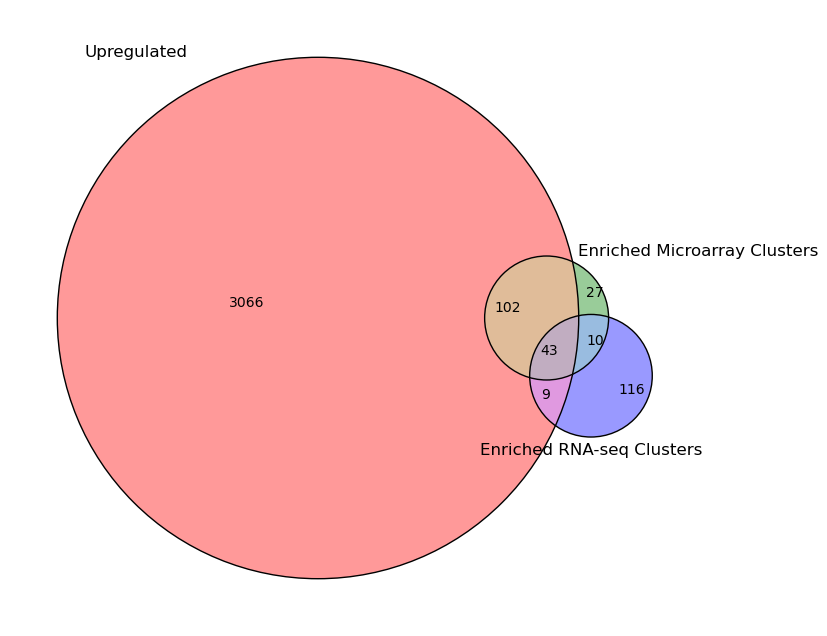

In [84]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Define the sets
sets = {
    'Upregulated': set(ttherm_df_filtered['Unnamed: 0'].values),
    'Enriched Microarray Clusters': set(microarray_ev_enriched_df['TTHERM_ID'].values),
    'Enriched RNA-seq Clusters': set(rna_seq_ev_enriched_df['TTHERM_ID'].values),
}

# Create the Venn diagram with specified figure size
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize here as needed

# Create a 3-set Venn diagram
v = venn3([sets['Upregulated'], sets['Enriched Microarray Clusters'], sets['Enriched RNA-seq Clusters']],
          ('Upregulated', 'Enriched Microarray Clusters', 'Enriched RNA-seq Clusters'),
          ax=ax)

venn3_circles(
    subsets=(
    sets['Upregulated'], 
    sets['Enriched Microarray Clusters'], 
    sets['Enriched RNA-seq Clusters']),
    linewidth=1,
    
)

# Save the plot in SVG format
plt.savefig('muco_venn.svg', format='svg')

# Display the plot
plt.show()

In [85]:
intersection_all = (set(ttherm_df_filtered['Unnamed: 0'].values).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)))

In [86]:
intersection_all = (set(ttherm_df_filtered['Unnamed: 0'].values).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)))
intersection_enriched = (set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)) - intersection_all
intersection_dem = (set(ttherm_df_filtered['Unnamed: 0'].values)).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)) - intersection_all
intersection_der = (set(ttherm_df_filtered['Unnamed: 0'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)) - intersection_all

In [87]:
len(intersection_all), len(intersection_enriched), len(intersection_dem), len(intersection_der)

(43, 10, 102, 9)

In [88]:
print(f'{len(intersection_all)} gene intersection between all gene groups:')
print(*sorted(intersection_all), sep=', ')

print(f'{len(intersection_enriched)} gene intersection between the genes in the microarray enriched clusters and the RNA-seq enriched clusters:')
print(*sorted(intersection_enriched), sep=', ')

print(f'{len(intersection_dem)} gene intersection between the differentially expressed genes and the genes in the microarray enriched clusters:')
print(*sorted(intersection_dem), sep=', ')

print(f'{len(intersection_der)} gene intersection between the differentially expressed genes and the genes in the RNA-seq enriched clusters:')
print(*sorted(intersection_der), sep=', ')

43 gene intersection between all gene groups:
TTHERM_00011710, TTHERM_00038880, TTHERM_00046372, TTHERM_00047330, TTHERM_00052190, TTHERM_00059370, TTHERM_00092820, TTHERM_00141050, TTHERM_00145480, TTHERM_00193465, TTHERM_00283760, TTHERM_00313130, TTHERM_00314860, TTHERM_00317390, TTHERM_00318900, TTHERM_00321720, TTHERM_00390080, TTHERM_00392790, TTHERM_00410180, TTHERM_00410210, TTHERM_00445920, TTHERM_00471040, TTHERM_00473020, TTHERM_00486275, TTHERM_00522740, TTHERM_00550920, TTHERM_00572100, TTHERM_00585170, TTHERM_00630030, TTHERM_00649180, TTHERM_00670750, TTHERM_00697290, TTHERM_00755930, TTHERM_00773700, TTHERM_00773710, TTHERM_00787390, TTHERM_00938950, TTHERM_01049340, TTHERM_01122800, TTHERM_01213910, TTHERM_01287970, TTHERM_01321550, TTHERM_01372820
10 gene intersection between the genes in the microarray enriched clusters and the RNA-seq enriched clusters:
TTHERM_00221120, TTHERM_00378890, TTHERM_00522600, TTHERM_00527180, TTHERM_00537380, TTHERM_00624720, TTHERM_00624

In [78]:
int_all_ev = intersection_all.intersection(set(muco_exp_list))
len(int_all_ev)

16

In [79]:
int_enr_ev = intersection_enriched.intersection(set(muco_exp_list))
len(int_enr_ev)

7

In [80]:
int_dem_ev = intersection_dem.intersection(set(muco_exp_list))
len(int_dem_ev)

9

In [81]:
int_der_ev = intersection_der.intersection(set(muco_exp_list))
len(int_der_ev)

0

In [82]:
agreement = int_all_ev.union(int_enr_ev).union(int_dem_ev).union(int_der_ev)
len(agreement)

32

In [83]:
lost = []
for t in muco_exp_list:
    if t not in agreement:
        lost.append(t)

In [84]:
', '.join(lost)

'TTHERM_00566910, TTHERM_00658810, TTHERM_00886960, TTHERM_00498010, TTHERM_00290710'

In [85]:
'TTHERM_00467390' in ttherm_df['Unnamed: 0'].values

True

In [86]:
', '.join(int_all_ev)

'TTHERM_00059370, TTHERM_01287970, TTHERM_00052190, TTHERM_00193465, TTHERM_00410180, TTHERM_00486275, TTHERM_00317390, TTHERM_00313130, TTHERM_00572100, TTHERM_00670750, TTHERM_00410210, TTHERM_01122800, TTHERM_00011710, TTHERM_01213910, TTHERM_00445920, TTHERM_00047330'

In [87]:
', '.join(int_enr_ev)

'TTHERM_00522600, TTHERM_01055600, TTHERM_00624720, TTHERM_00221120, TTHERM_00624730, TTHERM_00527180, TTHERM_00378890'

In [88]:
', '.join(int_dem_ev)

'TTHERM_00283800, TTHERM_00227750, TTHERM_00321680, TTHERM_01332070, TTHERM_00420770, TTHERM_00141040, TTHERM_00558350, TTHERM_00013410, TTHERM_00241790'

In [89]:
', '.join(int_der_ev)

''

In [90]:
len(enr_coexp.intersection(set(muco_exp_list)))

23

In [99]:
len(intersection_all), len(muco_exp)

(43, 37)

In [100]:
len(intersection_all.intersection(muco_exp))

16

In [101]:
print(*intersection_all.intersection(muco_exp), sep=', ')

TTHERM_00059370, TTHERM_01287970, TTHERM_00052190, TTHERM_00193465, TTHERM_00410180, TTHERM_00486275, TTHERM_00317390, TTHERM_00313130, TTHERM_00572100, TTHERM_00670750, TTHERM_00410210, TTHERM_01122800, TTHERM_00011710, TTHERM_01213910, TTHERM_00445920, TTHERM_00047330


### What is in the secretome (Madinger et al., 2010)?

In [107]:
# From their supplementary materials, Table 2
secretome_ids = ['474970',
 '378810',
 '912260',
 '624760',
 '411610',
 '299820',
 '630570',
 '149680',
 '731370',
 '630500',
 '164950',
 '209440',
 '427500',
 '1277530',
 '585170',
 '00086780',
 '1002860',
 '1002870',
 '00038880',
 '476450',
 '196530',
 '527400',
 '794490',
 '1433580',
 '569419',
 '630620',
 '590090',
 '191370',
 '780890',
 '310590',
 '320050',
 '00047130',
 '125640',
 '558440',
 '1080440',
 '912290',
 '938820',
 '471470',
 '00068170',
 '859260',
 '00046480',
 '1013300',
 '487090',
 '216010',
 '00160770',
 '402120',
 '129820',
 '1068140',
 '520951',
 '521950',
 '00535640',
 '220690',
 '00321600',
 '00321640',
 '629960',
 '629970',
 '227830',
 '230960',
 '242300',
 '527180',
 '473020',
 '624730',
 '624720',
 '378890',
 '522600',
 '1055600',
 '1018540',
 '221120',
 '221130',
 '129830',
 '00056060',
 '158520',
 '537380',
 '00049470',
 '145290',
 '148850',
 '156740',
 '189070',
 '249730',
 '249740',
 '249750',
 '268210',
 '292250',
 '298270',
 '310880',
 '336030',
 '355420',
 '373770',
 '00377390',
 '382240',
 '415670',
 '415690',
 '418170',
 '437360',
 '444810',
 '444890',
 '486700',
 '497360',
 '551040',
 '554290',
 '559980',
 '566690',
 '569430',
 '579210',
 '633120',
 '994220',
 '1043150',
 '335740',
 '361770',
 '412150',
 '659060',
 '1386080',
 '185540',
 '777260',
 '777250',
 '442170',
 '515220',
 '716040',
 '837960',
 '951910',
 '951920',
 '688280',
 '1125120',
 '1009950',
 '662749',
 '497680',
 '823510',
 '00070730',
 '1085640',
 '1027470',
 '133570',
 '1015980',
 '661740',
 '662750',
 '663790',
 '998860',
 '1243480',
 '00094060',
 '522940',
 '222360',
 '112700',
 '1265000',
 '652570',
 '138600',
 '301900',
 '532170',
 '289550',
 '352190',
 '1008630',
 '629930',
 '46589',
 '00412070',
 '161010',
 '79610',
 '00083480',
 '823810',
 '1256490',
 '79600',
 '161130',
 '879300',
 '881420',
 '881450',
 '79640',
 '00079650',
 '660360',
 '660380',
 '660390',
 '660410',
 '802340',
 '881330',
 '881410',
 '00075840',
 '879270',
 '881380',
 '532060',
 '00102770',
 '102779',
 '641150',
 '79450',
 '881440',
 '530660',
 '683060',
 '755950',
 '268060',
 '760310',
 '211520',
 '320350',
 '469210',
 '00066890',
 '657510',
 '203010',
 '467860',
 '2563200',
 '279710',
 '417920',
 '417930',
 '417940',
 '418110',
 '683010',
 '475140',
 '415730',
 '606960',
 '540050',
 '600280',
 '00016340',
 '225860',
 '155260']

In [108]:
# Specifically peptides that are over-secreted in starved SB281 vs. starved SB210,
# peptides that are detectable in at least two MS replicates in starved SB281 (Madinger et al. Suppl. Tab. 1)
# 

ssb281_ids = [
    "TTHERM_00585170",
    "TTHERM_00527180",
    "TTHERM_00624730",
    "TTHERM_00624720",
    "TTHERM_00378890",
    "TTHERM_00522600",
    "TTHERM_01055600",
    "TTHERM_01018540",
    "TTHERM_00221120",
    "TTHERM_00221130",
    "TTHERM_00537380",
    "TTHERM_00185540",
    "TTHERM_00530660",
    "TTHERM_00755950",
    
]

In [109]:
', '.join(ssb281_ids)

'TTHERM_00585170, TTHERM_00527180, TTHERM_00624730, TTHERM_00624720, TTHERM_00378890, TTHERM_00522600, TTHERM_01055600, TTHERM_01018540, TTHERM_00221120, TTHERM_00221130, TTHERM_00537380, TTHERM_00185540, TTHERM_00530660, TTHERM_00755950'

In [110]:
ssb281_matches = []
ambiguous = []
for i in ssb281_ids:
    match = modified_annotation[modified_annotation['TTHERM_ID'].str.contains(i)]
    if len(match) == 1:
        ssb281_matches.append(match['TTHERM_ID'].values[0])
    elif len(match) > 1:
        ambiguous.append(list(match['TTHERM_ID'].values))

secretome_matches = []
for i in secretome_ids:
    match = modified_annotation[modified_annotation['TTHERM_ID'].str.contains(i)]
    if len(match) == 1:
        secretome_matches.append(match['TTHERM_ID'].values[0])
    elif len(match) > 1:
        ambiguous.append(list(match['TTHERM_ID'].values))

In [111]:
ambiguous

[]

In [112]:
len(ssb281_matches)

14

In [113]:
len(ssb281_ids)

14

In [114]:
len(secretome_matches)

197

In [115]:
ssb281_secretome_df = modified_annotation.loc[modified_annotation['TTHERM_ID'].isin(ssb281_matches)]

In [116]:
ssb281_secretome_df

,TTHERM_ID,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,peptide,common_name,InterPro,InterPro_description,mucocysts
1247,TTHERM_00530660,34740.HMEL003507-PA,4.1e-152,501.6,"COG4870@1|root,KOG1542@2759|Eukaryota,KOG1543@...",33208|Metazoa,O,Papain family cysteine protease,-,-,...,-,-,-,"Inhibitor_I29,Peptidase_C1",CTH99 papain family cysteine protease,MRTQLLIAAALGLTLLGLTSYLFLHKSTQVGYTDDQINMWKGFKKT...,CTH99,"IPR000169,IPR000668,IPR013128,IPR013201,IPR025...","Cysteine peptidase, cysteine active site,Pepti...",-
4266,TTHERM_00221120,5911.EAS00439,0.0,1777.2,"2EAG9@1|root,2SGQ6@2759|Eukaryota,3ZBTY@5878|C...",5878|Ciliophora,S,Beta/Gamma crystallin,-,-,...,-,-,-,Crystall,GRT1 granule tip protein,MRKSWIIIAALLVVSAVADVKLVTSEFSAKNFDSSAVSGWSVTGNK...,GRT1,IPR011024,Gamma-crystallin-like,EV
4647,TTHERM_00221130,5911.EAS00440,0.0,1756.2,"2EAG9@1|root,2SGQ6@2759|Eukaryota,3ZBTY@5878|C...",5878|Ciliophora,S,Beta/Gamma crystallin,-,-,...,-,-,-,Crystall,GRT2 granule tip protein,MRKYQIIIATLLVVSVVADVKLVTQEFTAKNFDSSAVSGWQVTGNK...,GRT2,IPR011024,Gamma-crystallin-like,DE
6646,TTHERM_01055600,5911.EAS07284,2.9000000000000004e-258,843.6,"2EIZF@1|root,2SP2E@2759|Eukaryota,3ZC9H@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,GRL8 Ndc1 protein,MNKALVFLAIIALGFAASTQQVSALDPSENAADALIDQLNQMEGAI...,GRL8,-,-,EV
6704,TTHERM_00527180,5911.EAS07881,2.5e-264,864.8,"2EQA4@1|root,2STBN@2759|Eukaryota,3ZCEK@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,GRL1 hypothetical protein,MNKKLLVVLFGFLALAAATNQSEEEGSYTIDQAANLLNDLLADSQQ...,GRL1,-,-,EV
7857,TTHERM_00378890,5911.EAR95225,5.1e-236,770.7,"2D56R@1|root,2SXJ0@2759|Eukaryota,3ZE96@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,GRL5 granule lattice protein,MRVIAALLVIALVCQSAMAVTSKSQAKLMMEKINSKLEKSHLGRAL...,GRL5,-,-,EV
9683,TTHERM_00755950,34740.HMEL003507-PA,5.3999999999999996e-160,527.4,"COG4870@1|root,KOG1542@2759|Eukaryota,KOG1543@...",33208|Metazoa,O,Papain family cysteine protease,-,-,...,-,-,-,"Inhibitor_I29,Peptidase_C1",CTH72 papain family cysteine protease,MNKQLLLLALLGTALIGSTVFLLVKSNNNVQENEENLAQLWSLWKK...,CTH72,"IPR000169,IPR000668,IPR013128,IPR013201,IPR038...","Cysteine peptidase, cysteine active site,Pepti...",-
11130,TTHERM_00585170,5932.XP_004031023.1,3.5e-58,188.0,"2E8FT@1|root,2SEY1@2759|Eukaryota,3ZDIA@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,CCF11 dentin sialophosphoprotein putative,MQGKLIVLFACLMVASYAQTRCWNDYSVMKKGVLASCVDGCRDYPT...,CCF11,"IPR008160,IPR011024,IPR050938","Collagen triple helix repeat,Gamma-crystallin-...",DE
11459,TTHERM_01018540,5911.EAR90056,3.4e-239,781.0,"2D56R@1|root,2SXJ0@2759|Eukaryota,3ZE96@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,GRL9 granule lattice protein,MRVIAALLVIALVCQSAMAVTSKSQVKLMMEKINSKMEKSPLGRAL...,GRL9,-,-,DE
14326,TTHERM_00185540,5911.EAR91189,1.5e-07,18.8,"2CFF7@1|root,2R2YT@2759|Eukaryota,3ZFEE@5878|C...",5911.EAR91189|-,-,-,-,-,...,-,-,-,-,transmembrane protein putative,MNKLIATLPLIALLIAGSAFYLAKSNNQLEAAVAISNNLSFFDWAK...,Unnamed,-,-,-


In [117]:
intersection_all.intersection(set(secretome_matches))

{'TTHERM_00038880', 'TTHERM_00473020', 'TTHERM_00585170'}

In [118]:
intersection_all.intersection(set(ssb281_matches))

{'TTHERM_00585170'}

In [119]:
intersection_dem.intersection(set(secretome_matches))

set()

In [120]:
intersection_dem.intersection(set(ssb281_matches))

set()

In [121]:
intersection_der.intersection(set(secretome_matches))

set()

In [122]:
intersection_der.intersection(set(ssb281_matches))

set()

In [123]:
intersection_enriched.intersection(set(secretome_matches))

{'TTHERM_00221120',
 'TTHERM_00378890',
 'TTHERM_00522600',
 'TTHERM_00527180',
 'TTHERM_00537380',
 'TTHERM_00624720',
 'TTHERM_00624730',
 'TTHERM_01002860',
 'TTHERM_01002870',
 'TTHERM_01055600'}

In [124]:
intersection_enriched.intersection(set(ssb281_matches))

{'TTHERM_00221120',
 'TTHERM_00378890',
 'TTHERM_00522600',
 'TTHERM_00527180',
 'TTHERM_00537380',
 'TTHERM_00624720',
 'TTHERM_00624730',
 'TTHERM_01055600'}

In [125]:
for t in ssb281_matches:
    print(t, )


TTHERM_00585170
TTHERM_00527180
TTHERM_00624730
TTHERM_00624720
TTHERM_00378890
TTHERM_00522600
TTHERM_01055600
TTHERM_01018540
TTHERM_00221120
TTHERM_00221130
TTHERM_00537380
TTHERM_00185540
TTHERM_00530660
TTHERM_00755950


### Contingency tables to determine if any of the set intersections are statistically significantly enriched for experimentally-validated genes

For z-score normalized analysis:

In [126]:
# Example contingency table for triple intersection (min-max scenario)
#                   validated  | not validated | row total
# _________________________________________________________
# agreement    |       17      |       27      |    44               
# no agreement |       23      |      3355     |   3378      
# column total |       40      |      3382     |   3412

In [127]:
a = len(int_all_ev)
print(a)
b = len(intersection_all) - a
print(b)
c = len(muco_exp) - a
print(c)
d = len(set(ttherm_df_filtered['Unnamed: 0'].values).union(
    set(microarray_ev_enriched_df['TTHERM_ID'].values)).union(
    set(rna_seq_ev_enriched_df['TTHERM_ID'].values))) - c
print(d)

16
27
21
3352


In [128]:
table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value for triple agreement: {p_value_two_tailed}")

Two-tailed p-value for triple agreement: 1.8379637030817764e-22


In [129]:
# Contingency table for intersection between RNA-seq co-expression and upregulation
a = len(int_der_ev)
b = len(set(ttherm_df_filtered['Unnamed: 0'].values).intersection(
    set(rna_seq_ev_enriched_df['TTHERM_ID'].values))) - a - len(intersection_all)
c = len(muco_exp) - a
d = len(set(ttherm_df_filtered['Unnamed: 0'].values).union(
    set(rna_seq_ev_enriched_df['TTHERM_ID'].values))) - c - len(intersection_all)

print(a,b,c,d)

table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value for agreement between RNA-seq and upregulation: {p_value_two_tailed}")

0 9 37 3266
Two-tailed p-value for agreement between RNA-seq and upregulation: 1.0


In [130]:
# Contingency table for intersection between microarray co-expression and upregulation
a = len(int_dem_ev)
b = len(set(ttherm_df_filtered['Unnamed: 0'].values).intersection(
    set(microarray_ev_enriched_df['TTHERM_ID'].values))) - a - len(intersection_all)
c = len(muco_exp) - a
d = len(set(ttherm_df_filtered['Unnamed: 0'].values).union(
    set(microarray_ev_enriched_df['TTHERM_ID'].values))) - c - len(intersection_all)

print(a, b, c, d)

table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value for agreement between microarray and upregulation: {p_value_two_tailed}")

9 93 28 3186
Two-tailed p-value for agreement between microarray and upregulation: 1.0518626319626857e-06


In [131]:
# Contingency table for intersection between microarray and rna-seq co-expression
a = len(int_enr_ev)
b = len(set(rna_seq_ev_enriched_df['TTHERM_ID'].values).intersection(
    set(microarray_ev_enriched_df['TTHERM_ID'].values))) - a - len(intersection_all)
c = len(muco_exp) - a
d = len(set(rna_seq_ev_enriched_df['TTHERM_ID'].values).union(
    set(microarray_ev_enriched_df['TTHERM_ID'].values))) - c - len(intersection_all)

print(a,b,c,d)

table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value for agreement between microarray and rna-seq co-expression: {p_value_two_tailed}")

7 3 30 234
Two-tailed p-value for agreement between microarray and rna-seq co-expression: 4.251101424527858e-05
